In [14]:
from itertools import product
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [15]:
DATAROOT = '/data/datasets/MRI/'
MODEL = './outdir/mri/model_m(cyclegan)_d(basic)_g(vit-unet)_train-uvcgan-(1.0:1e-05:5e-05)_mri-368/'
MODEL = './outdir/mri/model_m(pix2pix)_d(basic)_g(vit-unet)_train-uvcgan-(1.0:1e-05:5e-05)_mri-368/'
SCRIPTROOT = '/home/yhuang2/PROJs/uvcgan4slats/scripts'

TRAN = f'{SCRIPTROOT}/translate_data.py'
PLOT = f'{SCRIPTROOT}/plot_comparison.py/'

EPOCH = 500
RESULTROOT = f'{MODEL}/evals/epoch_{EPOCH:04d}/ndarrays_eval-test/'
RESULTROOT = f'{MODEL}/evals/final/ndarrays_eval-test/'
# RESULTROOT = f'{MODEL}/evals/final/ndarrays_eval-train/'

In [19]:
cuda = 7
tran_cmd = f'CUDA_VISIBLE_DEVICES={cuda} python {TRAN} "{MODEL}" -n 8 --split test'
! {tran_cmd}

Load checkpoint at epoch None
none
Translating 0: 100%|██████████████████████████████| 8/8 [00:01<00:00,  6.80it/s]
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadp

In [12]:
def load_fnames(path):
    return sorted(list(Path(path).glob('*npz')))


def load_npz(npz_fname):
    with np.load(npz_fname) as fh:
        return fh[fh.files[0]]

fnames = {}

for dtype, domain in product(['real', 'fake'], ['a', 'b']):
    key = f'{dtype}_{domain}'
    fnames[key] = load_fnames(Path(RESULTROOT)/key)

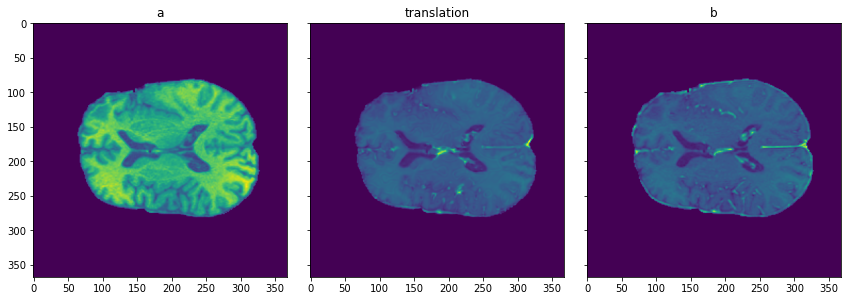

In [38]:
def get_tuple(fnames, idx, direction='ab'):
    src_domain, tgt_domain = direction
    
    src = load_npz(fnames[f'real_{src_domain}'][idx])
    trn = load_npz(fnames[f'fake_{tgt_domain}'][idx])
    tgt = load_npz(fnames[f'real_{tgt_domain}'][idx])
    
    return src, trn, tgt

idx = 18
src, trn, tgt = get_tuple(fnames, idx)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
for image, ax, subtitle in zip([src, trn, tgt], axes.flatten(), ['a', 'translation', 'b']):
    ax.imshow(image, vmin=-1, vmax=1)
    ax.set_title(subtitle)
fig.tight_layout()
# fig.savefig(f'{RESULTROOT}/plots/triplet_{idx}.png', bbox_inches='tight', transparent=False)

In [82]:
[6, 7, 8, 13, 15, 17, 20, 24, 46, 49, 51, 52, 54, 61] 

[6, 7, 8, 13]

In [28]:
a = './outdir/mri/model_m(cyclegan)_d(basic)_g(vit-unet)_train-uvcgan-(1.0:1e-05:5e-05)_mri-368//evals/epoch_0500/ndarrays_eval-test//plots/'

In [29]:
Path(a).exists()

False

In [9]:
a = './outdir/mri/model_m(pix2pix)_d(basic)_g(vit-unet)_train-uvcgan-(1.0:1e-05:5e-05)_mri-368/evals/'
Path(a).exists()

True